## Question?
**Which workplace factors (e.g., company size, available benefits, gender, remote work status) are associated with whether an employee seeks treatment for a mental health condition?**

## Data Dictionary
- Timestamp
- Age
- Gender
- Country
- state: If you live in the United States, which state or territory do you live in?
- self_employed: Are you self-employed?
- family_history: Do you have a family history of mental illness?
- treatment: Have you sought treatment for a mental health condition?
- work_interfere: If you have a mental health condition, do you feel that it interferes with your work?
- no_employees: How many employees does your company or organization have?
- remote_work: Do you work remotely (outside of an office) at least 50% of the time?
- tech_company: Is your employer primarily a tech company/organization?
- benefits: Does your employer provide mental health benefits?
- care_options: Do you know the options for mental health care your employer provides?
- wellness_program: Has your employer ever discussed mental health as part of an employee wellness program?
- seek_help: Does your employer provide resources to learn more about mental health issues and how to seek help?
- anonymity: Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?
- leave: How easy is it for you to take medical leave for a mental health condition?
- mentalhealthconsequence: Do you think that discussing a mental health issue with your employer would have negative consequences?
- physhealthconsequence: Do you think that discussing a physical health issue with your employer would have negative consequences?
- coworkers: Would you be willing to discuss a mental health issue with your coworkers?
- physhealthinterview: Would you bring up a physical health issue with a potential employer in an interview?
- mentalshealthinterview: Would you bring up a mental health issue with a potential employer in an interview?
- mentalvsphysical: Do you feel that your employer takes mental health as seriously as physical health?
- obs_consequence: Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?
- comments: Any additional notes or comments

## Importing Libraries and Data Loading

In [1]:
import numpy as np 
import pandas as pd  
pd.set_option('display.max_columns',None)

In [2]:
df_orig = pd.read_csv(r"C:\Users\HP\Desktop\notebook\survey.csv")
df = df_orig.copy()
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [3]:
df.tail()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,No,Yes,No,No,No,No,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,Yes,Yes,Yes,Yes,No,No,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,No,Yes,Yes,Yes,No,No,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,Yes,Yes,No,Yes,No,No,Don't know,Don't know,Yes,No,No,No,No,No,No,No,NaN
1258,2016-02-01 23:04:31,25,Male,United States,IL,No,Yes,Yes,Sometimes,26-100,No,No,Yes,Yes,No,No,Yes,Don't know,Maybe,No,Some of them,No,No,No,Don't know,No,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [5]:
df.shape

(1259, 27)

In [6]:
df.columns = df.columns.str.lower()

Dropping columns that don't contribute to our research questions:
 1) `comments`: Text data requires separate NLP analysis and adds complexity 
    to our quantitative EDA without directly addressing workplace factors 
    or risk prediction
 
 2) `timestamp`: Collection timing doesn't relate to individual mental health 
    outcomes or workplace factors in our cross-sectional analysis  
 
 3) `state`: Limited to US states only, doesn't capture broader workplace 
    factors or individual risk predictors relevant to our research questions


In [7]:
df = df.drop(columns=['timestamp','comments','state'])
df.head()

,age,gender,country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


Converting `country` to a binary feature:
- 'is_usa': 1 if United States (60% of data), 0 otherwise (others 40%)
- Retains key geographic context without the complexity of many categories

In [8]:
df['is_usa'] = df['country'].apply(lambda x: 'yes' if x == 'United States' else 'no')

## Data Error Detection

In [9]:
for col in df.columns:    
    if df[col].dtype == 'object':   
        df[col] = df[col].str.lower()
    print(f"columns: {col} {df[col].unique()}",'\n')

columns: age [         37          44          32          31          33          35
          39          42          23          29          36          27
          46          41          34          30          40          38
          50          24          18          28          26          22
          19          25          45          21         -29          43
          56          60          54         329          55 99999999999
          48          20          57          58          47          62
          51          65          49       -1726           5          53
          61           8          11          -1          72] 

columns: gender ['female' 'm' 'male' 'male-ish' 'maile' 'trans-female' 'cis female' 'f'
 'something kinda male?' 'cis male' 'woman' 'mal' 'male (cis)'
 'queer/she/they' 'non-binary' 'femake' 'make' 'nah' 'all' 'enby' 'fluid'
 'genderqueer' 'female ' 'androgyne' 'agender' 'cis-female/femme'
 'guy (-ish) ^_^' 'male leaning androgynous' 'ma

Treating `age` based on domain knowledge considering minimum age to work is 15 and mostly people retire before their 70's.

In [10]:
print(f"The percentage of age below 15 years in our dataset: {((df['age'] < 15).sum() / len(df)).round(3)}")
print(f"The percentage of age above 70 years in our dataset: {((df['age'] > 70 ).sum() / len(df)).round(3)}")

df = df[(df['age'] > 15) & (df['age'] < 70)]
df.shape

The percentage of age below 15 years in our dataset: 0.005
The percentage of age above 70 years in our dataset: 0.002


(1250, 25)

In [11]:
# Treating Gender Column

df['gender'] = df['gender'].str.strip()
df['gender'] = df['gender'].str.replace(r"[^\w\s]", "", regex=True)

gender_map = {
    'male': 'male', 'm': 'male', 'cis man': 'male',
    'man': 'male', 'mail': 'male', 'make': 'male', 'mal': 'male', 'male cis': 'male',
    'malr':'male','msle':'male','guy ish _':'male',
    'cis male':'male','something kinda male':'male','maleish':'male','maile':'male',

    'femail': 'female', 'f': 'female', 'female cis': 'female',
    'cis female': 'female', 'female trans': 'female',
    'femake': 'female', 'woman': 'female',
    'cis femme': 'female', 'cisfemalefemme':'female',
    }

df['gender'] = df['gender'].map(gender_map).fillna('others')

In [12]:
target_col = ['treatment']

numerical_col = ['age']

binary_cols = ['family_history', 'remote_work', 'tech_company', 'obs_consequence','is_usa']

ternary_cols = ['benefits', 'care_options', 'wellness_program', 'seek_help', 'anonymity', 'mental_vs_physical','gender']

ordinal_cols = ['coworkers', 'supervisor','work_interfere','leave','no_employees','mental_health_consequence', 
                'phys_health_consequence','mental_health_interview', 'phys_health_interview']

binary_nan = ['self_employed']


In [13]:
df.shape

(1250, 25)

Keeping the maybe_cols as it is as "maybe" represents uncertainty about workplace culture, a meaningful middle ground. Someone unsure about consequences likely has different risk perceptions than someone confident either way . This uncertainty itself could be a predictor of mental health outcomes

In [14]:
# Treating ternary columns
for col in ternary_cols:
    df[col] = df[col].str.lower().replace(["don't know","not sure"], "unknown")


In [15]:
# Treating ordinal columns

Encoding the ordinal columns (will be used in modelling)

In [16]:
willingness_order = ['no', 'some of them', 'yes']
df['coworkers'] = pd.Categorical(
    df['coworkers'],
    categories=willingness_order,
    ordered=True
)
df['supervisor'] = pd.Categorical(
    df['supervisor'],
    categories=willingness_order,
    ordered=True
)

df['coworkers_code'] = df['coworkers'].cat.codes
df['supervisor_code'] = df['supervisor'].cat.codes

interfere_order = ['never', 'rarely', 'sometimes', 'often', 'unknown']
df['work_interfere'] = pd.Categorical(
    df['work_interfere'],
    categories=interfere_order,
    ordered=True
)
df['work_interfere_code'] = df['work_interfere'].cat.codes

leave_order = ['very easy', 'somewhat easy', 'somewhat difficult', 'very difficult', "don't know"]
df['leave'] = pd.Categorical(
    df['leave'],
    categories=leave_order,
    ordered=True
)
df['leave_code'] = df['leave'].cat.codes

size_order = ['1-5', '6-25', '26-100', '100-500', '500-1000', 'more than 1000']
df['no_employees'] = pd.Categorical(
    df['no_employees'],
    categories=size_order,
    ordered=True
)
df['no_employees_code'] = df['no_employees'].cat.codes


willing_order = ['no', 'maybe', 'yes']
df['mental_health_consequence'] = pd.Categorical(
    df['mental_health_consequence'],
    categories=willing_order,
    ordered=True
)
df['phys_health_consequence'] = pd.Categorical(
    df['phys_health_consequence'],
    categories=willing_order,
    ordered=True
)
df['mental_health_interview'] = pd.Categorical(
    df['mental_health_interview'],
    categories=willing_order,
    ordered=True
)
df['phys_health_interview'] = pd.Categorical(
    df['phys_health_interview'],
    categories=willing_order,
    ordered=True
)
df['mental_health_consequence_code'] = df['mental_health_consequence'].cat.codes
df['phys_health_consequence_code'] = df['phys_health_consequence'].cat.codes
df['mental_health_interview_code'] = df['mental_health_interview'].cat.codes
df['phys_health_interview_code'] = df['phys_health_interview'].cat.codes


In [17]:
ordinal_col_code = ['coworkers_code', 'supervisor_code','work_interfere_code','leave_code','no_employees_code','mental_health_consequence_code', 
                                    'phys_health_consequence_code','mental_health_interview_code', 'phys_health_interview_code']

## Missing and Duplicated Value Analysis

In [18]:
missing_values = df.isnull().sum() 
missing_values[missing_values > 0]

self_employed      18
work_interfere    262
dtype: int64

In [19]:
df[df.duplicated()]

,age,gender,country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,is_usa,coworkers_code,supervisor_code,work_interfere_code,leave_code,no_employees_code,mental_health_consequence_code,phys_health_consequence_code,mental_health_interview_code,phys_health_interview_code
821,35,male,denmark,yes,yes,yes,often,1-5,no,yes,no,yes,yes,no,unknown,somewhat easy,no,no,some of them,some of them,maybe,yes,yes,no,no,1,1,3,1,0,0,0,1,2
860,32,male,united kingdom,no,yes,yes,rarely,6-25,no,no,no,no,no,no,no,don't know,yes,maybe,some of them,no,no,no,no,no,no,1,0,1,4,1,2,1,0,0
1134,27,male,new zealand,no,no,no,rarely,26-100,no,yes,no,yes,no,yes,no,somewhat difficult,yes,no,no,no,no,maybe,no,yes,no,0,0,1,2,2,2,0,0,1
1218,28,male,netherlands,no,no,no,NaN,6-25,no,yes,no,unknown,no,no,unknown,somewhat easy,maybe,maybe,some of them,some of them,no,no,unknown,no,no,1,1,-1,1,1,1,1,0,0


In [20]:
# Dropping duplicate rows
# It is possible that the same respondent submitted the survey multiple times.
df = df.drop_duplicates()  

In [21]:
# Treating the missing values
df['work_interfere'].value_counts(), df['self_employed'].value_counts()

(work_interfere
 sometimes    464
 never        211
 rarely       171
 often        139
 unknown        0
 Name: count, dtype: int64,
 self_employed
 no     1087
 yes     141
 Name: count, dtype: int64)

Imputing `self_employed` with the mode is reasonable, as the missing values are a small percentage. For the `work_interfere` column, however, it is more logical to treat missing values as a separate category "unknown", since they account for ~20% of the dataset and may indicate that employees are avoiding this question.

In [22]:
df['self_employed'] = df['self_employed'].fillna(df['self_employed'].mode()[0])
df['work_interfere'] = df['work_interfere'] = df['work_interfere'].fillna('unknown')

## Descriptive Statistics

In [23]:
df.describe().round(2)

,age,coworkers_code,supervisor_code,work_interfere_code,leave_code,no_employees_code,mental_health_consequence_code,phys_health_consequence_code,mental_health_interview_code,phys_health_interview_code
count,1246.00,1246.00,1246.00,1246.00,1246.00,1246.00,1246.00,1246.00,1246.00,1246.00
mean,32.05,0.97,1.10,1.01,2.44,2.43,0.84,0.31,0.23,0.76
std,7.21,0.62,0.84,1.35,1.60,1.71,0.77,0.55,0.49,0.71
min,18.00,0.00,0.00,-1.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,27.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00
50%,31.00,1.00,1.00,1.00,3.00,2.00,1.00,0.00,0.00,1.00
75%,36.00,1.00,2.00,2.00,4.00,4.00,1.00,1.00,0.00,1.00
max,65.00,2.00,2.00,3.00,4.00,5.00,2.00,2.00,2.00,2.00


In [24]:
df.describe(include='object').round(2)

,gender,country,self_employed,family_history,treatment,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,mental_vs_physical,obs_consequence,is_usa
count,1246,1246,1246,1246,1246,1246,1246,1246,1246,1246,1246,1246,1246,1246,1246
unique,3,46,2,2,2,2,2,3,3,3,3,3,3,2,2
top,male,united states,no,no,yes,no,yes,yes,no,no,no,unknown,unknown,no,yes
freq,984,745,1105,760,629,876,1022,472,498,834,638,812,572,1067,745


## Distribution and Relationship Plots

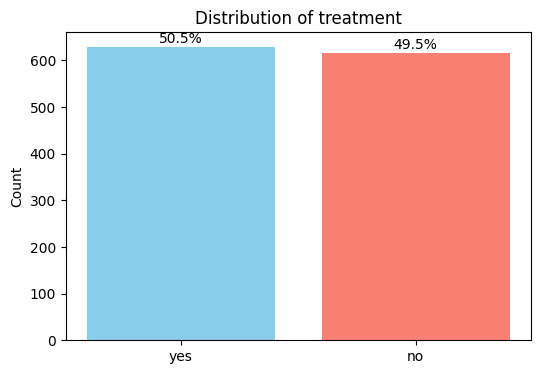

In [25]:
# Distribution of the target column
import seaborn as sns
import matplotlib.pyplot as plt

col = 'treatment'
counts = df['treatment'].value_counts()
total = len(df)

plt.figure(figsize=(6,4))
bars = plt.bar(counts.index, counts.values, color=['skyblue', 'salmon'])

for bar in bars:
    height = bar.get_height()
    percent = height / total * 100
    plt.text(bar.get_x() + bar.get_width()/2, height + 2, f'{percent:.1f}%', 
             ha='center', va='bottom')

plt.title(f'Distribution of {col}')
plt.ylabel('Count')
plt.show()


Our Target variable is balanced

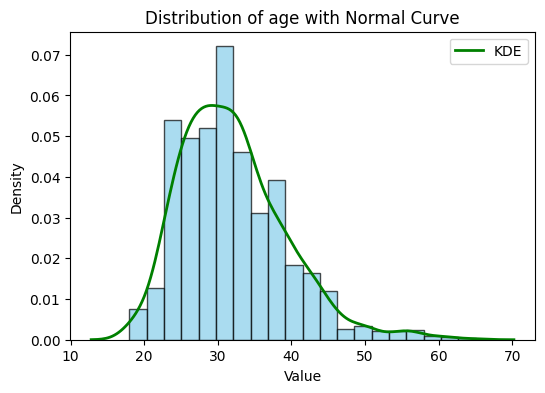

In [26]:
# Getting the distribution of "age"

col = 'age'
data = df[col]

plt.figure(figsize=(6,4))
count, bins, ignored = plt.hist(data, bins=20, density=True, color='skyblue', edgecolor='black', alpha=0.7)

sns.kdeplot(data, color='green', linewidth=2, label='KDE')

plt.title(f'Distribution of {col} with Normal Curve')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()


The `age` column is slighly right skewed suggesting that most employees are mid-aged and a smaller number of employees are older.

In [27]:
import math

binary_cols = binary_cols + binary_nan # Becaues now the missing value is treated
def plot_features_vs_target(df, features, target="treatment"):
    n_features = len(features)
    n_cols = 3  # number of plots per row
    n_rows = math.ceil(n_features / n_cols)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(6*n_cols, 4*n_rows))
    axes = axes.flatten()

    for i, feature in enumerate(features):
        if feature in df.columns:
            # Get normalized percentages
            ctab = pd.crosstab(df[feature], df[target], normalize="index") * 100
            
            # Plot as grouped bar chart
            ctab.plot(kind="bar", ax=axes[i], color=["#c54739", "#33d192"])
            
            axes[i].set_title(f"{feature} vs {target}")
            axes[i].set_ylabel("Percentage")
            axes[i].set_xlabel(feature)
            axes[i].legend(title=target)
        else:
            axes[i].set_visible(False)

    # Hide any unused subplots
    for j in range(i+1, len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()

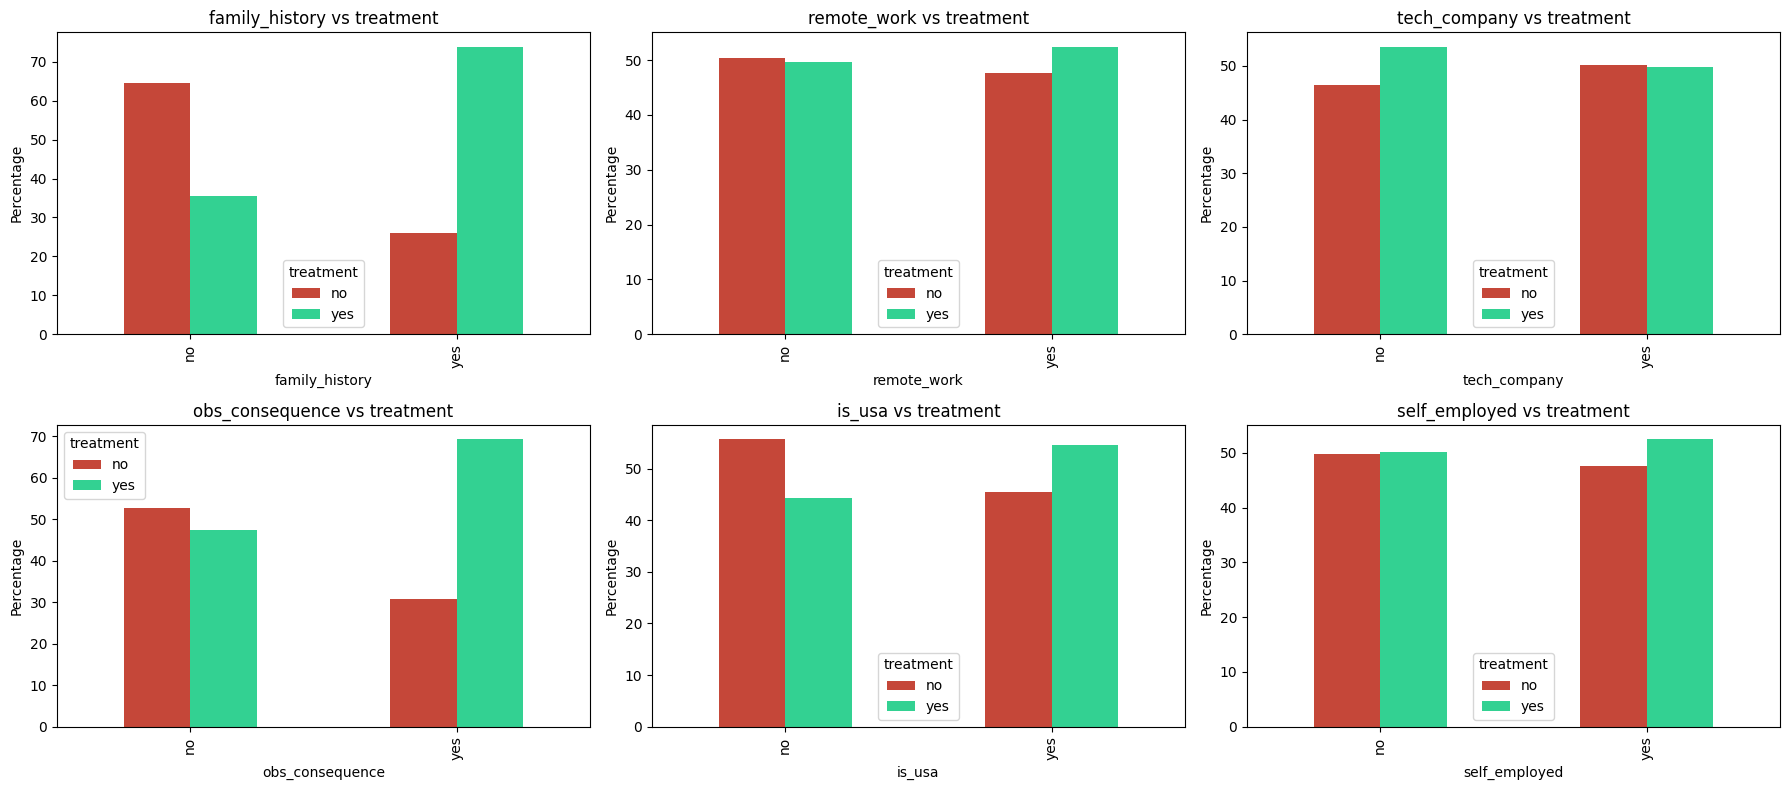

In [28]:
plot_features_vs_target(df, binary_cols, target="treatment")

**Strong Associations**

`family_history`: People with a family history of mental illness are about twice as likely to seek treatment (~75% vs ~35%).

`obs_consequence`: Those who have seen coworkers face negative outcomes for mental health issues are more likely to seek treatment (~70% vs ~48%).

**Moderate Associations**

`is_usa`: US respondents seek treatment more often than Non-US respondents (~58% vs ~45%).

**Minimal Associations**

`self_employed`, `remote_work`, `tech_company`: These factors show little to no difference (~50% treatment rate across groups).

**Key Takeaway**

Personal and cultural factors (like family history and stigma in the workplace) matter more for treatment-seeking than structural factors (like tech company or remote work).

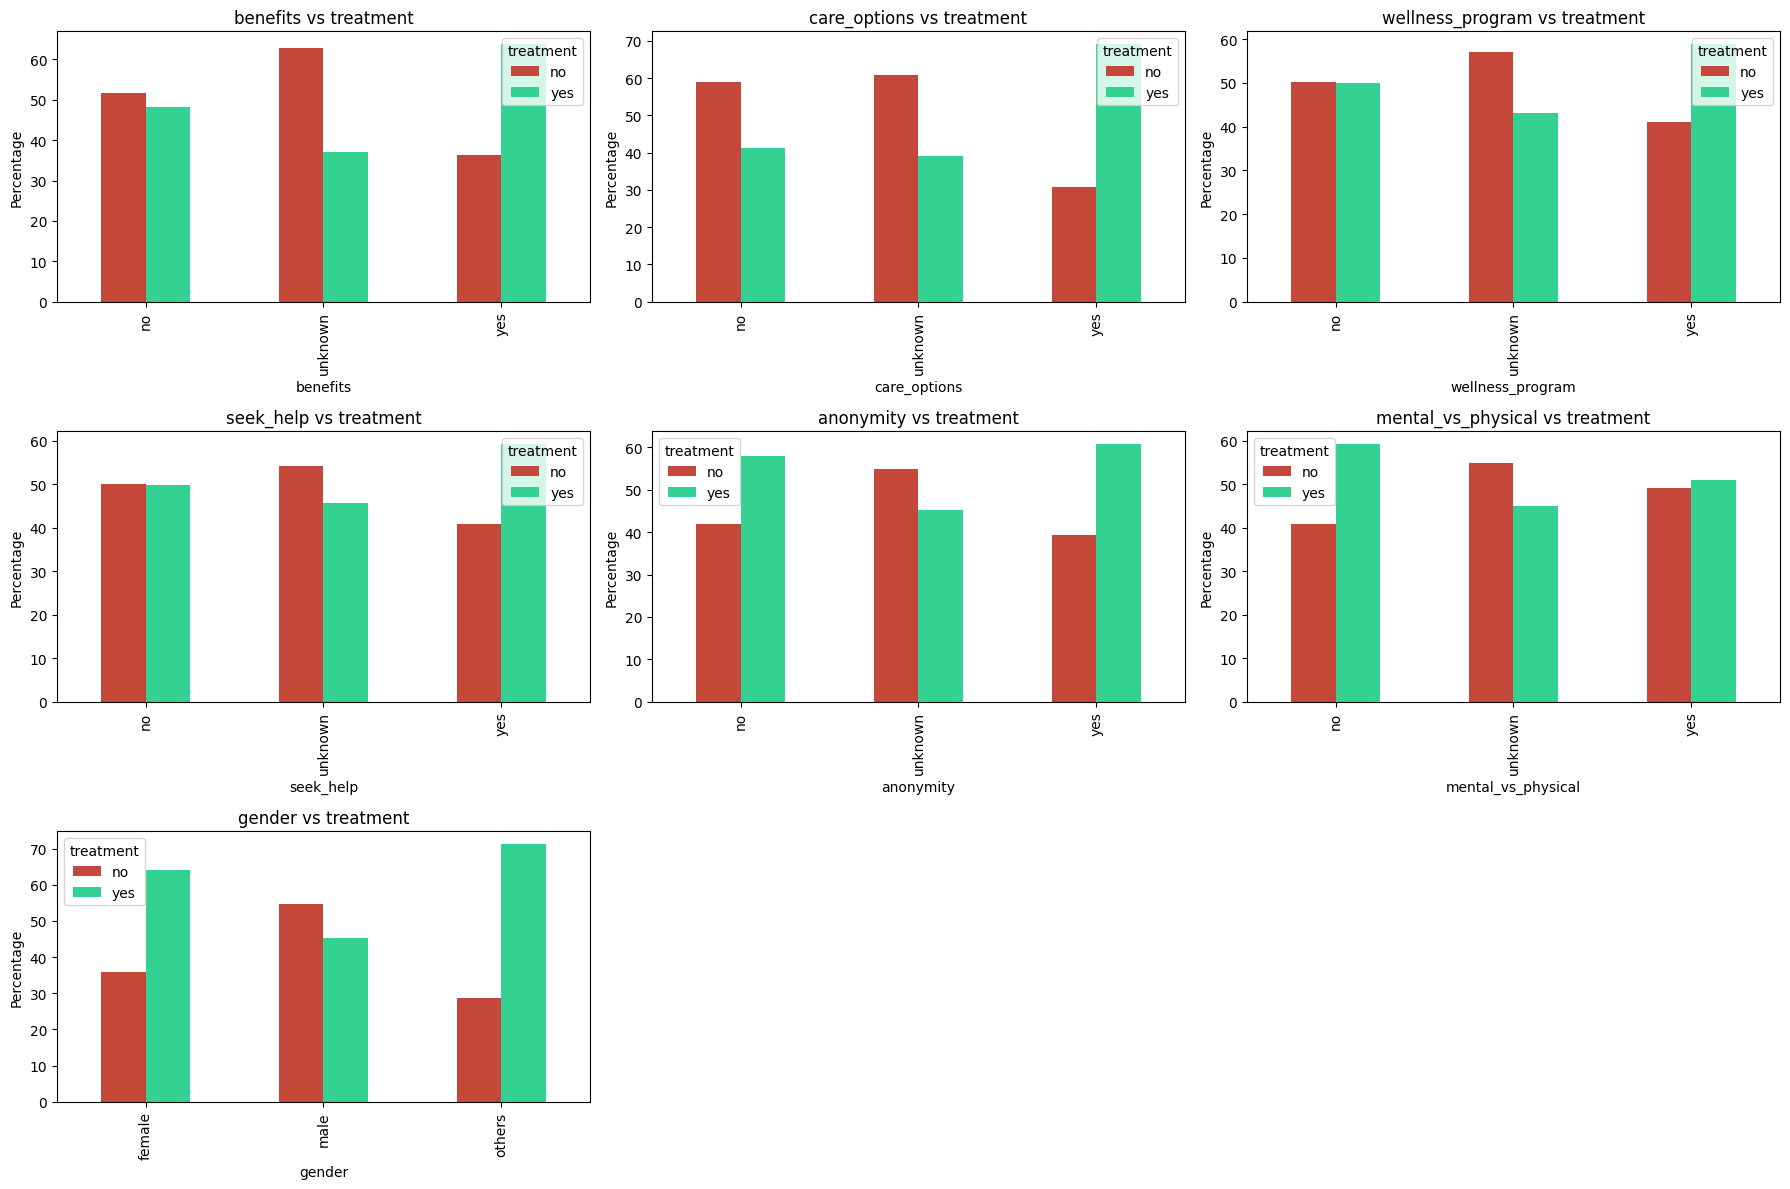

In [29]:
plot_features_vs_target(df, ternary_cols, target="treatment")

**Strong Differences**

`gender`: Females (~65%) and those identifying as "Others" (~70%) are more likely to seek treatment than males (~45%).

`anonymity`: Guaranteed anonymity increases treatment seeking (~60%) compared to no anonymity (~58%) or uncertainty (~45%).

`care_options`: Awareness of care options strongly boosts treatment (~70%) compared to those unaware (~40%).

**Moderate Differences**

`benefits`: Employees with benefits show higher treatment rates (~63%) than those without (~48%) or unsure (~38%).

`wellness_programs`: Participation increases treatment (~58%) vs those without programs (~48%).

**Minimal Differences**

`seek_help` and `mental_vs_physical` Health Perceptions: Show mostly balanced distributions (~50/50), with only small variations.

**Key Findings**

The factors most strongly associated with employees seeking mental health treatment are gender, confidentiality of resources, and awareness of available care options. Workplace offerings such as benefits and wellness programs have a positive effect, but their impact is limited unless employees trust the system and clearly understand how to access support

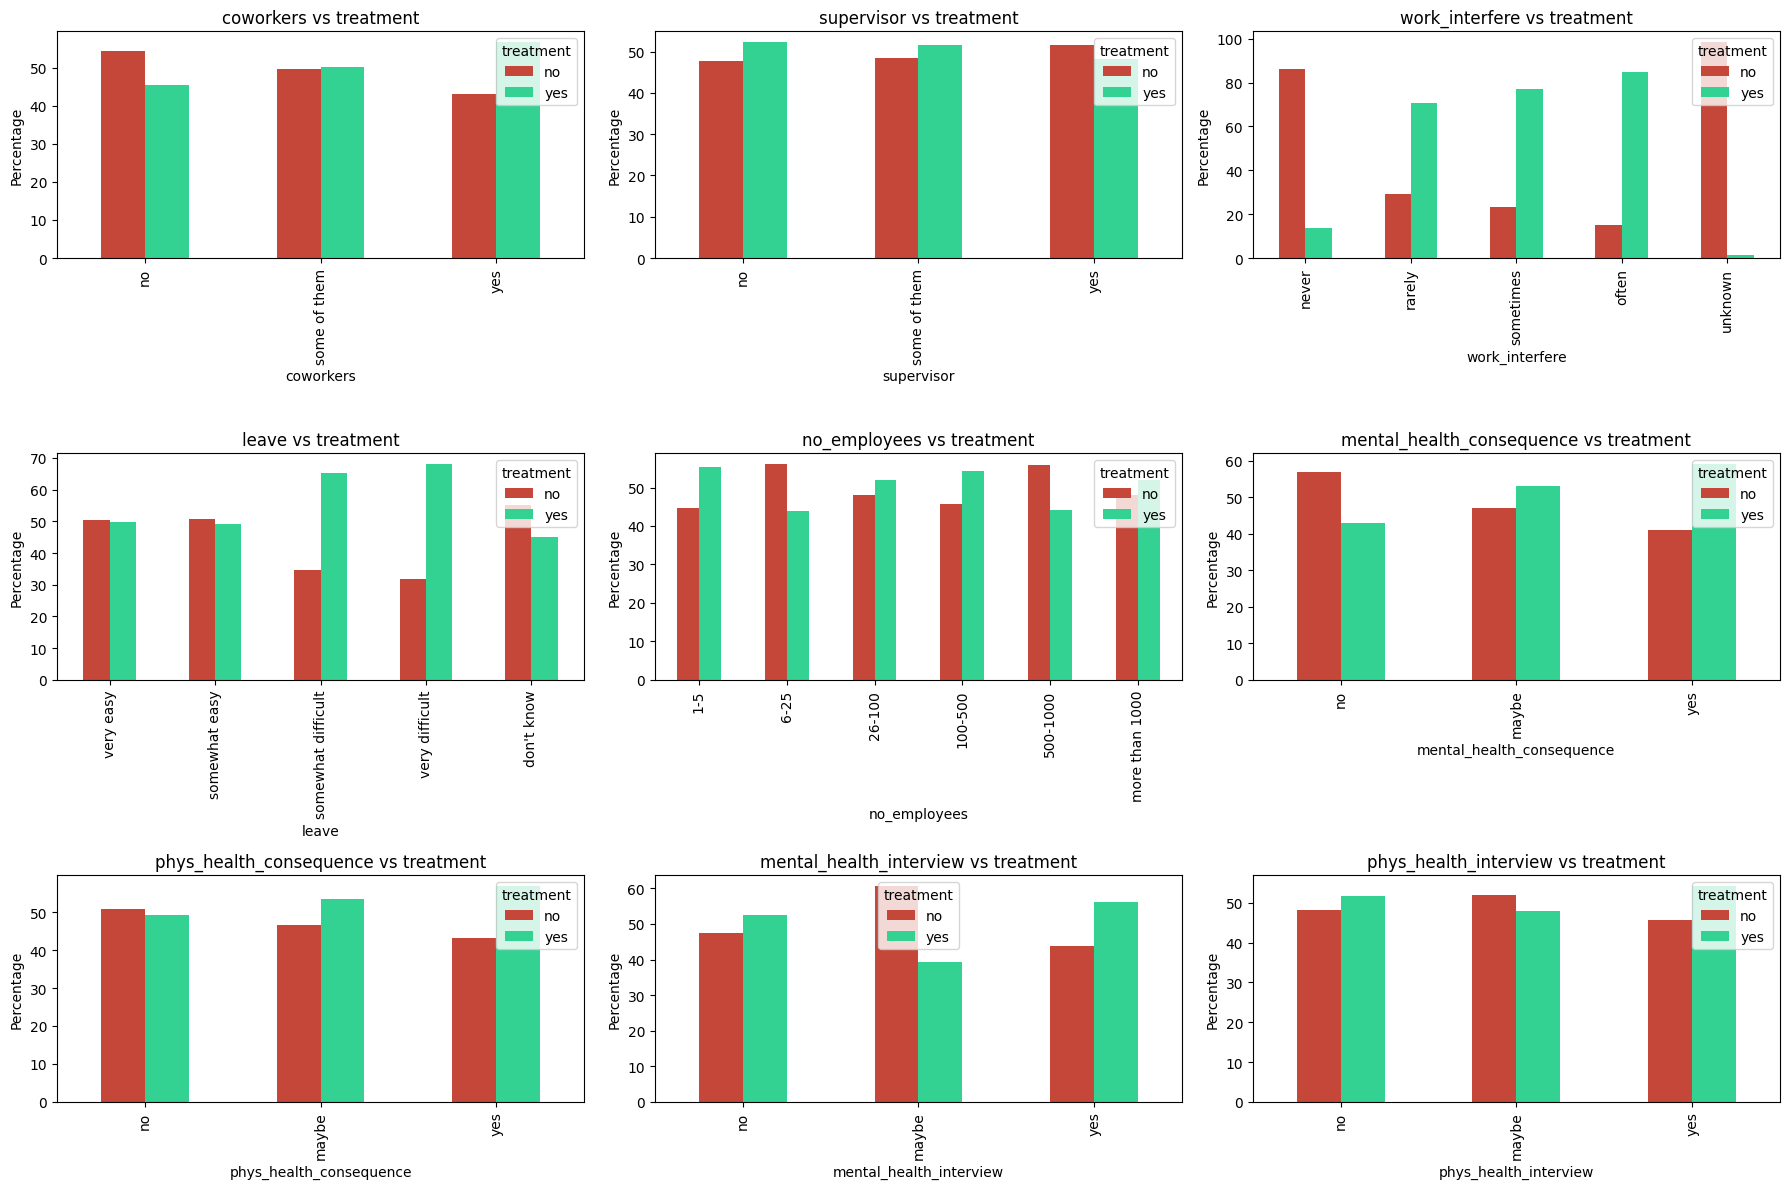

In [30]:
plot_features_vs_target(df, ordinal_cols, target="treatment")

**Strongest Associations**

`work_interfere`: The more work is affected by mental health, the more likely employees are to seek treatment (from ~15% yes for “Never” to ~85% yes for “Often”).

`leave` Medical Leave Difficulty: Employees who find it hard to take medical leave show higher treatment rates (~65–68% yes), suggesting those with greater needs pursue care despite barriers.

**Moderate Associations**

`supervisor` Supervisor Discussions: Willingness to discuss mental health with supervisors shows little impact, with slightly lower treatment rates for those who do (~48% yes).

`mental_health_consequences`: Employees who anticipate negative consequences for mental health issues are still more likely to seek treatment (~59% yes) than those who don’t (~43% yes).

`mental_health_interview`: Willingness or ability to discuss mental health in interviews is linked to higher treatment rates (~55% yes vs ~40% for "maybe").

**Minimal Associations**

`coworker` Coworker Discussions : shows minimal effect on treatment (~45–55% yes across categories).

`physical_health_consequences` and `physical_health_interview`: These show little to no impact on mental health treatment (~47–52% across categories).

**Key Takeaways**

Symptom severity (work interference) is the strongest driver of treatment seeking.

Barriers to leave also influence treatment, with higher treatment rates for those facing difficulties.

Workplace social factors (coworkers/supervisors) and company size have minimal impact.

Workplace mental health initiatives should focus on reducing barriers to care rather than only improving culture or structural features.

Mental health specific workplace perceptions influence treatment seeking more than general physical health attitudes.

Employees may pursue treatment despite concerns about stigma, and openness in workplace discussions supports higher treatment rates.

## Dependence Measure

In [31]:
# Encoding the target
df['treatment_encoded'] = df['treatment'].map({'no': 0, 'yes': 1})

In [32]:
from scipy.stats import chi2_contingency, spearmanr, pointbiserialr, mannwhitneyu
from sklearn.preprocessing import LabelEncoder

def cramers_v(x, y):
    """Cramér's V statistic for categorical-categorical association."""
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1),(rcorr-1)))

def association_with_target(df, col, target_col, col_type):
    """
    Compute association between predictor (col) and binary target.
    col_type: "binary", "nominal", "ordinal", "numeric"
    """
    y = df[target_col]
    results = {"variable": col, "type": col_type}

    if col_type in ["binary", "nominal"]:
        table = pd.crosstab(df[col], y)
        chi2, p, _, _ = chi2_contingency(table)
        results["test"] = "Chi-square"
        results["p_value"] = p
        results["effect_size"] = cramers_v(df[col], y)

    elif col_type == "ordinal":
        rho, p = spearmanr(df[col], y)
        results["test"] = "Spearman"
        results["p_value"] = p
        results["effect_size"] = rho

    elif col_type == "numeric":
        r, p = pointbiserialr(y, df[col])
        results["test"] = "Point-biserial"
        results["p_value"] = p
        results["effect_size"] = r

    return results

binary_cols = binary_cols
nominal_cols = ternary_cols
ordinal_cols = ordinal_col_code
numeric_cols = ['age']

results = []

for col in binary_cols:
    results.append(association_with_target(df, col, 'treatment_encoded', 'binary'))

for col in nominal_cols:
    results.append(association_with_target(df, col, 'treatment_encoded', 'nominal'))

for col in ordinal_cols:
    results.append(association_with_target(df, col, 'treatment_encoded', 'ordinal'))

for col in numeric_cols:
    results.append(association_with_target(df, col, 'treatment_encoded', 'numeric'))

results_df = pd.DataFrame(results)

results_df = results_df.sort_values(by="effect_size", key=np.abs, ascending=False)


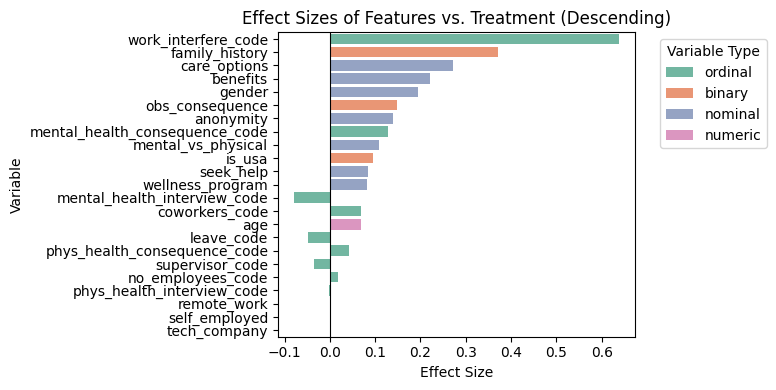

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

plot_df = results_df.copy()
plot_df['abs_effect_size'] = plot_df['effect_size'].abs()
plot_df = plot_df.sort_values(by='abs_effect_size', ascending=False) 

plt.figure(figsize=(8, 4))

sns.barplot(
    x='effect_size',
    y='variable',
    data=plot_df,
    hue='type',         
    dodge=False,
    palette='Set2'
)

plt.xlabel('Effect Size')
plt.ylabel('Variable')
plt.title('Effect Sizes of Features vs. Treatment (Descending)')
plt.axvline(0, color='black', linewidth=0.8)  
plt.legend(title='Variable Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Its safe to remove, since the predictor adds no predictive power.

Keeping the negative effect size, because the model can use both positive and negative associations.

Logistic regression, tree-based models etc handle negative coefficients naturally.

In [34]:
model_cols = binary_cols + ternary_cols  + ordinal_col_code +  ['age']
target = df['treatment_encoded']
model_df = df[model_cols]
columns_to_drop = ['tech_company', 'self_employed', 'remote_work', 'phys_health_interview_code']
df_model = model_df.drop(columns=columns_to_drop).copy()
df_model.head()

,family_history,obs_consequence,is_usa,benefits,care_options,wellness_program,seek_help,anonymity,mental_vs_physical,gender,coworkers_code,supervisor_code,work_interfere_code,leave_code,no_employees_code,mental_health_consequence_code,phys_health_consequence_code,mental_health_interview_code,age
0,no,no,yes,yes,unknown,no,yes,yes,yes,others,1,2,3,1,1,0,0,0,37
1,no,no,yes,unknown,no,unknown,unknown,unknown,unknown,male,0,0,1,4,5,1,0,0,44
2,no,no,no,no,no,no,no,unknown,no,male,2,2,1,2,1,0,0,2,32
3,yes,yes,no,no,yes,no,no,no,no,male,1,0,3,2,2,2,2,1,31
4,no,no,yes,yes,no,unknown,unknown,unknown,unknown,male,1,2,0,4,3,0,0,2,31


In [35]:
X = df_model
y = target
X = pd.get_dummies(X, drop_first=True)

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8235294117647058
ROC-AUC: 0.8941512941512941
Confusion Matrix:
 [[145  40]
 [ 26 163]]


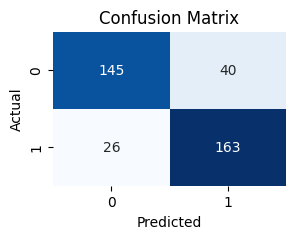

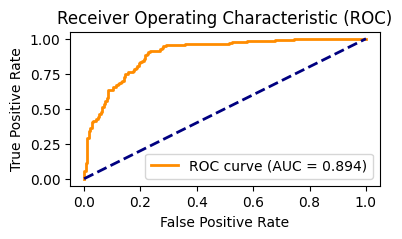

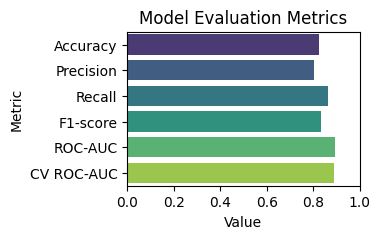

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    precision_score, recall_score, f1_score,
    accuracy_score, roc_auc_score, confusion_matrix,
    roc_curve, auc
)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

cv_scores = cross_val_score(model, X, y, cv=5, scoring='roc_auc')
mean_cv_auc = cv_scores.mean()

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(3,2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc_val = auc(fpr, tpr)

plt.figure(figsize=(4,2))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_val:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC-AUC', 'CV ROC-AUC'],
    'Value': [accuracy, precision, recall, f1, roc_auc, mean_cv_auc]
})

plt.figure(figsize=(3,2))
sns.barplot(
    x='Value', 
    y='Metric', 
    data=metrics_df, 
    hue='Metric',  
    dodge=False,   
    legend=False,   
    palette='viridis'
)
plt.xlim(0,1)
plt.title('Model Evaluation Metrics')
plt.show()
